# Laboratorium 1: Analiza częstotliwościowa sygnałów czasu dyskretnego

## Autorzy:
    Mateusz Ostaszewski
    Karol Kuc


In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Zad1
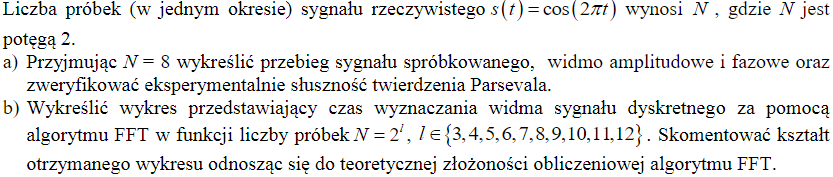

## A


### Sygnał spróbkowany

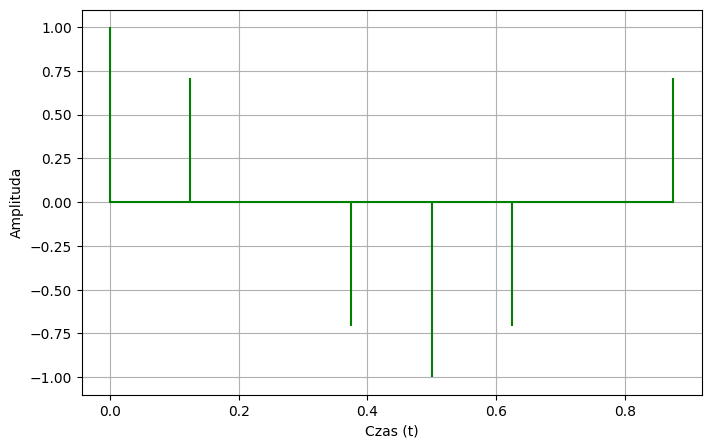

In [44]:
# Parametry
N = 8
t = np.arange(N) / N  # Normalizacja czasu do jednego okresu
s = np.cos(2 * np.pi * t)  # Sygnał sinusoidalny

# Wykres sygnału spróbkowanego
plt.figure(figsize=(8, 5))
plt.stem(t, s, 'g', markerfmt=" ", basefmt="-g")
plt.xlabel('Czas (t)')
plt.ylabel('Amplituda')
plt.grid(True)

### Widmo amplitudowe i fazowe


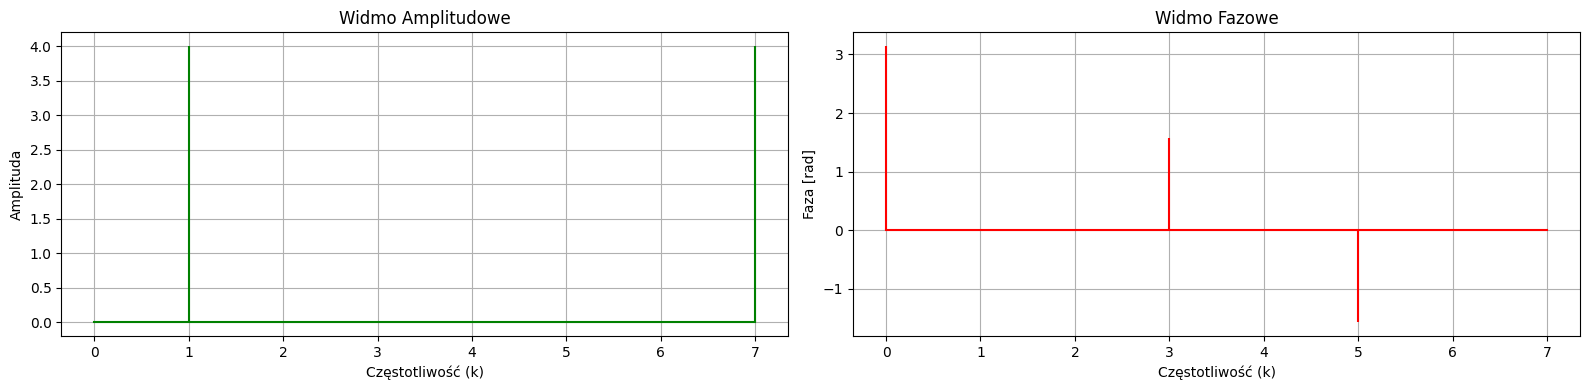

In [45]:
# FFT
fft_result = np.fft.fft(s)
amplitude_spectrum = np.abs(fft_result)
phase_spectrum = np.angle(fft_result)

# wykres dla widma amplitudowego i fazowego
fig, axs = plt.subplots(1, 2, figsize=(16, 4))

# amplitudowe
axs[0].stem(range(N), amplitude_spectrum, 'g', markerfmt=" ", basefmt="-g")
axs[0].set_title('Widmo Amplitudowe')
axs[0].set_xlabel('Częstotliwość (k)')
axs[0].set_ylabel('Amplituda')
axs[0].grid(True)

# Widmo fazowe
axs[1].stem(range(N), phase_spectrum, 'r', markerfmt=" ", basefmt="-r")
axs[1].set_title('Widmo Fazowe')
axs[1].set_xlabel('Częstotliwość (k)')
axs[1].set_ylabel('Faza [rad]')
axs[1].grid(True)

plt.tight_layout()


### Weryfikacja twierdzenia
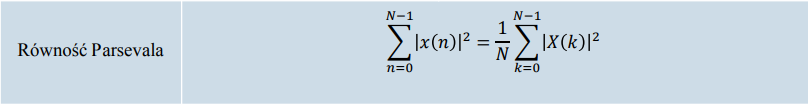

Aby zweryfikować eksperymentalnie twierdzenie Parsevala, należy porównać całkowitą energię sygnału w dziedzinie czasu z całkowitą energią w dziedzinie częstotliwości. 

In [27]:
energy_in_time_domain = np.sum(np.abs(s)**2)
energy_in_freqency_domain = np.sum(np.abs(fft_result)**2) / N

print(f"Całkowita energia sygnału w dziedzinie czasu wynosi: {energy_in_time_domain}")
print(f"Calkowita Energia sygnału w dziedzinie częstotliwości wynosi: {energy_in_freqency_domain}")
print(f"Różnica między energią w dziedzinie czasu i częstotliwości wynosi: {energy_in_time_domain - energy_in_freqency_domain}")

Całkowita energia sygnału w dziedzinie czasu wynosi: 4.0
Calkowita Energia sygnału w dziedzinie częstotliwości wynosi: 4.0
Różnica między energią w dziedzinie czasu i częstotliwości wynosi: 0.0


Wyniki potwierdzają twierdzenie Parsevala, mówiące, że całkowita energia sygnału w dziedzinie czasu jest równa całkowitej energii sygnału w dziedzinie częstotliwości.

## B
Wizualizacja złożoności obliczeniowej poprzez pomiary czasów

Text(0.5, 1.0, 'Średni czas wykonania FFT w zależności od liczby próbek')

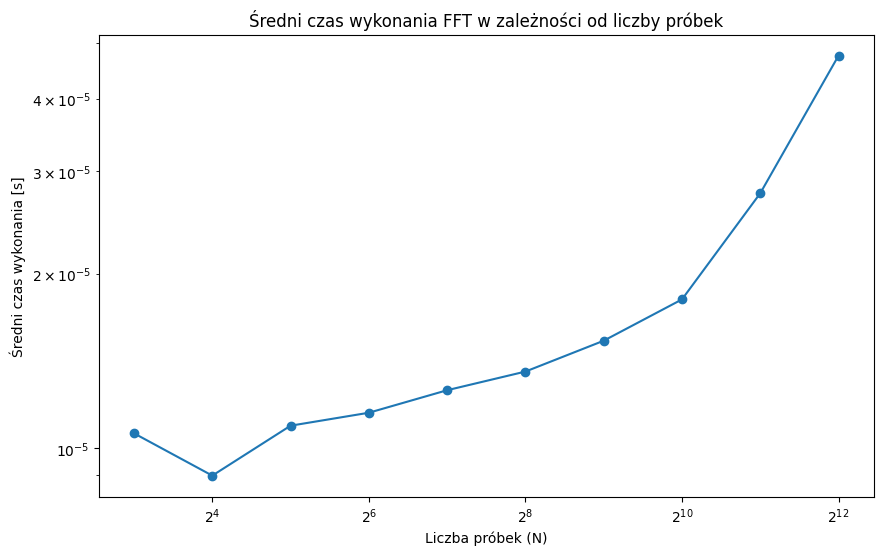

In [47]:
import timeit
from scipy.fft import fft

l_values = np.arange(3, 13)
N_values = 2**l_values
num_tests = 100 # duża liczba testów aby wyniki były uśrednione

average_times = []

for N in N_values:
    times = []
    for _ in range(num_tests):
        t = np.arange(N) / N
        s = np.cos(2 * np.pi * t)
        time = timeit.timeit('fft(s)', globals=globals(), number=1000) / 1000
        times.append(time)

    # Uśrednianie czasów wykonania dla danej wartości N
    average_time = np.mean(times)
    average_times.append(average_time)


plt.figure(figsize=(10, 6))
plt.plot(N_values, average_times, 'o-')
plt.xscale('log', base=2)
plt.yscale('log')
plt.xlabel('Liczba próbek (N)')
plt.ylabel('Średni czas wykonania [s]')
plt.title('Średni czas wykonania FFT w zależności od liczby próbek')

# Zad2
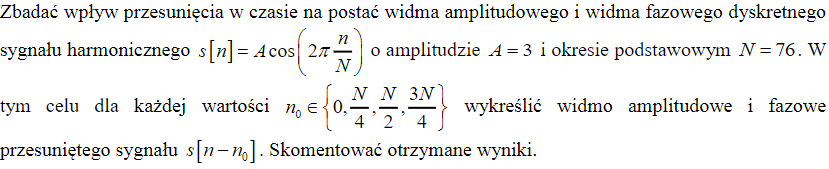

## Generowanie zadanego sygnału harmonicznego

Text(0, 0.5, 'Amplituda')

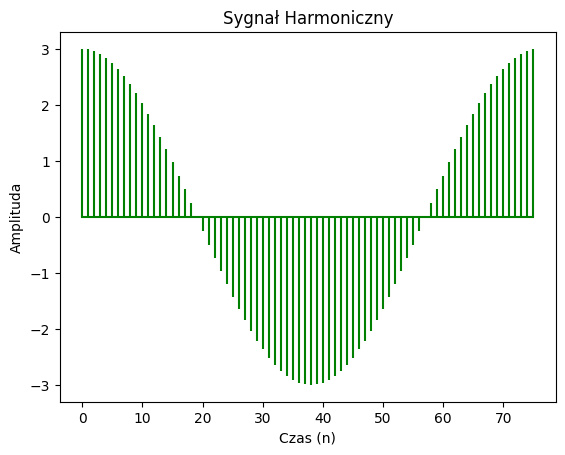

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# Paramtery
A = 3
N = 76

n = np.arange(N)
s = A * np.cos(2 * np.pi * n / N)

plt.stem(n, s, 'g', markerfmt=" ", basefmt="-g")
plt.title('Sygnał Harmoniczny')
plt.xlabel('Czas (n)')
plt.ylabel('Amplituda')

## Wykreślanie widma amplitudowego oraz fazowego dla wszystkich przesunięć

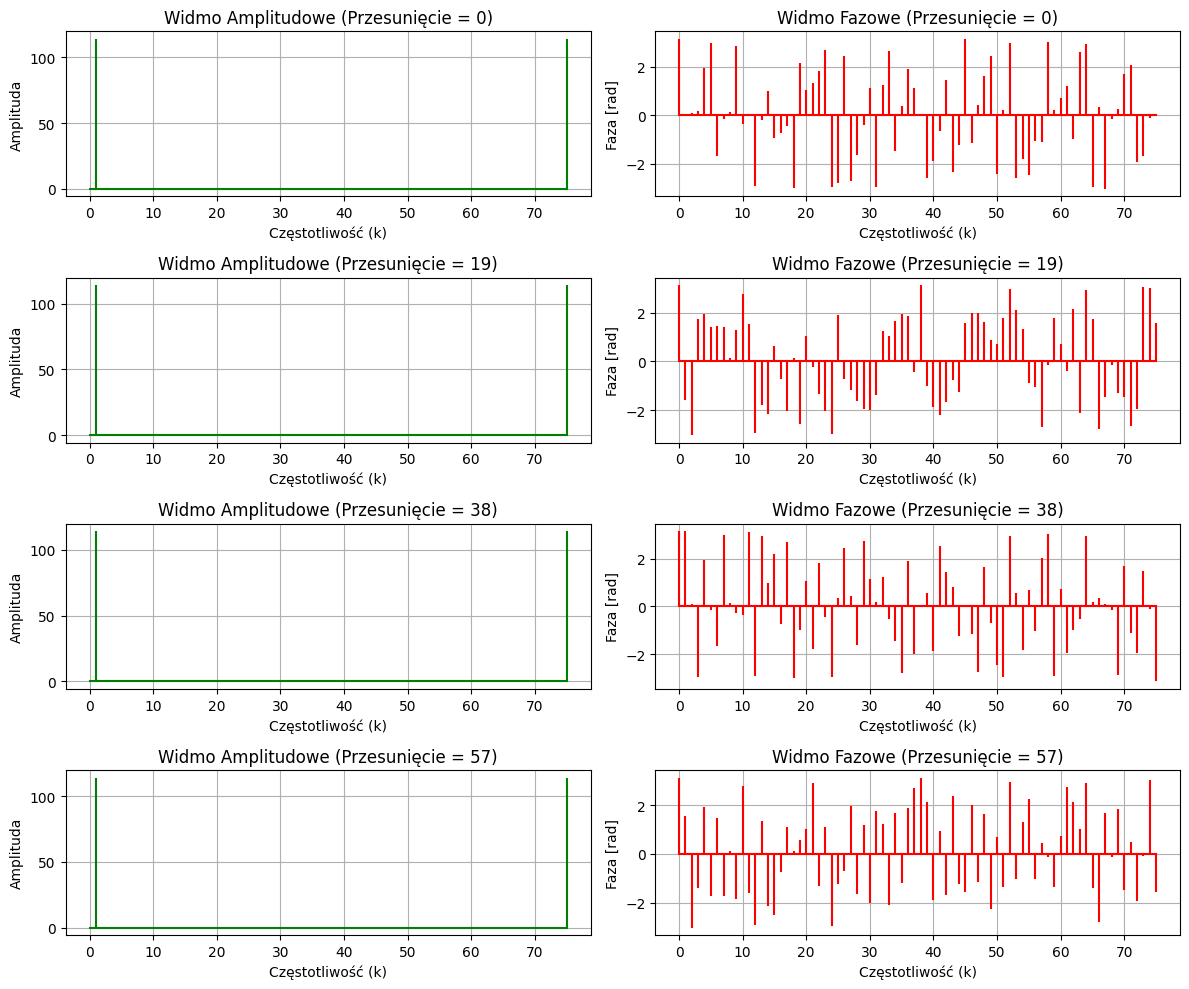

In [67]:
shifts = [0, N//4, N//2, 3*N//4]

fig, axs = plt.subplots(len(shifts), 2, figsize=(12, 10))

for i, shift in enumerate(shifts):
    shifted_signal = np.roll(s, shift)
    fft_result = np.fft.fft(shifted_signal)

    amplitude_spectrum = np.abs(fft_result)
    phase_spectrum = np.angle(fft_result)

    axs[i, 0].stem(n, amplitude_spectrum, 'g', markerfmt=" ", basefmt="-g")
    axs[i, 0].set_title(f'Widmo Amplitudowe (Przesunięcie = {shift})')
    axs[i, 0].set_ylabel('Amplituda')
    axs[i, 0].grid(True)
    axs[i, 0].set(xlabel='Częstotliwość (k)')

    axs[i, 1].stem(n, phase_spectrum, 'r', markerfmt=" ", basefmt="-r")
    axs[i, 1].set_title(f'Widmo Fazowe (Przesunięcie = {shift})')
    axs[i, 1].set_ylabel('Faza [rad]')
    axs[i, 1].grid(True)
    axs[i, 1].set(xlabel='Częstotliwość (k)')

plt.tight_layout()

## Wnioski

### Widmo Amplitudowe
Widmo amplitudowe sygnału przedstawia stałość wartości amplitud składowych częstotliwościowych sygnału, niezależnie od przesunięcia czasowego. To oznacza, że przesunięcie czasowe sygnału nie wpływa na obecność ani intensywność składowych częstotliwościowych sygnału w analizowanym zakresie. Ta niezmienność amplitudy w widmie jest fundamentalną właściwością, pozwalającą na identyfikację i analizę składowych częstotliwościowych sygnału bez względu na ich położenie w czasie.

### Widmo Fazowe
Widmo fazowe sygnału ulega zmianom w zależności od przesunięcia czasowego. Zmiana ta wskazuje, że przesunięcie czasowe wprowadza modyfikację fazy składowych częstotliwościowych sygnału. Informacja o fazie może dostarczać istotnych danych o charakterystyce sygnału. Przykładowo, w dziedzinach takich jak akustyka czy sejsmologia, analiza fazy może być wykorzystana do precyzyjnej lokalizacji źródeł dźwięku lub analizy ruchów sejsmicznych. Zmiana fazowa w odpowiedzi na przesunięcie czasowe podkreśla dynamikę sygnału

# Zad3